In [1]:
import pandas as pd
import ast
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("movies_metadata.csv")
df2 = pd.read_csv("credits.csv")
df2.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [18]:
atores = []
for e in range(0,len(df2["cast"])):
        data_dict = ast.literal_eval(df2["cast"][e])
        for palavras in data_dict:
            atores.append(palavras['name'])
# #atores
# df_atores = pd.DataFrame(atores)
# #df_atores.head()
# df_atores[0].value_counts().head()

atores       

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette',
 'Robin Williams',
 'Jonathan Hyde',
 'Kirsten Dunst',
 'Bradley Pierce',
 'Bonnie Hunt',
 'Bebe Neuwirth',
 'David Alan Grier',
 'Patricia Clarkson',
 'Adam Hann-Byrd',
 'Laura Bell Bundy',
 'James Handy',
 'Gillian Barber',
 'Brandon Obray',
 'Cyrus Thiedeke',
 'Gary Joseph Thorup',
 'Leonard Zola',
 'Lloyd Berry',
 'Malcolm Stewart',
 'Annabel Kershaw',
 'Darryl Henriques',
 'Robyn Driscoll',
 'Peter Bryant',
 'Sarah Gilson',
 'Florica Vlad',
 'June Lion',
 'Brenda Lockmuller',
 'Walter Matthau',
 'Jack Lemmon',
 'Ann-Margret',
 'Sophia Loren',
 'Daryl Hannah',
 'Burgess Meredith',
 'Kevin Pollak',
 'Whitney Houston',
 'Angela Bassett',
 'Loretta Devine',
 'Lela Rochon',
 'Gregory Hines',
 'Dennis Haysbert',
 'Michael Beach',
 'Mykelti Williamson',
 'Lamont Johnso

In [4]:
#pprint(data_dict)

In [5]:
# data_dict[1]['name']

In [6]:
df['original_title'].head()


0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: original_title, dtype: object

In [7]:
df.drop_duplicates(subset ="original_title", 
                     keep = 'first', inplace = True) 
df["original_title"].value_counts().value_counts()


1    43373
Name: original_title, dtype: int64

In [8]:
df['bilhao'] = df.revenue > 1e9

In [16]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']
df_super_clean.head()

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
3  False                                                NaN  16000000   
5  False                                                NaN  60000000   
8  False                                                NaN  35000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
5  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
8  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
3                                   NaN  31357  tt0114885                en   
5                                   NaN    949  tt0113277                en   
8                                   NaN   9091  tt0114576                en   

      original_title                                           overview  \
0          Toy Story  Led by Woody, Andy's toys live happily in his ...   
1            Jumanji  When siblings Judy and Peter discover an encha...   
3  Waiting to Exhale  Cheated on, mistreated and stepped on, the wom...   
5               Heat  Obsessive master thief, Neil McCauley leads a ...   
8       Sudden Death  International action superstar Jean Claude Van...   

   ...        revenue runtime  \
0  ...    373554033.0    81.0   
1  ...    262797249.0   104.0   
3  ...     81452156.0   127.0   
5  ...    187436818.0   170.0   
8  ...     64350171.0   106.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
5  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
8           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline              title  \
0                                                NaN          Toy Story   
1          Roll the dice and unleash the excitement!            Jumanji   
3  Friends are the people who let you be yourself...  Waiting to Exhale   
5                           A Los Angeles Crime Saga               Heat   
8                         Terror goes into overtime.       Sudden Death   

   video vote_average vote_count bilhao  
0  False          7.7     5415.0  False  
1  False          6.9     2413.0  False  
3  False          6.1       34.0  False  
5  False          7.7     1886.0  False  
8  False          5.5      174.0  False  

[5 rows x 25 columns]

In [14]:
df_mega_clean = df_super_clean[["id","genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)
df_mega_clean.head()

C:\Users\ana clara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


id                                             genres      budget  \
0    862  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  30000000.0   
1   8844  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  65000000.0   
3  31357  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  16000000.0   
5    949  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...  60000000.0   
8   9091  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...  35000000.0   

       revenue                               production_companies  
0  373554033.0     [{'name': 'Pixar Animation Studios', 'id': 3}]  
1  262797249.0  [{'name': 'TriStar Pictures', 'id': 559}, {'na...  
3   81452156.0  [{'name': 'Twentieth Century Fox Film Corporat...  
5  187436818.0  [{'name': 'Regency Enterprises', 'id': 508}, {...  
8   64350171.0  [{'name': 'Universal Pictures', 'id': 33}, {'n...

In [19]:
generos = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        generos.append(palavras['name'])
        

        
        
        
        
#df_generos = pd.DataFrame(generos)
#df_generos
#geneross = df_generos[0].value_counts()
#geneross
#geneross.plot(kind='bar')


['Animation',
 'Comedy',
 'Family',
 'Adventure',
 'Fantasy',
 'Family',
 'Comedy',
 'Drama',
 'Romance',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Thriller',
 'Adventure',
 'Action',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'History',
 'Drama',
 'Action',
 'Adventure',
 'Drama',
 'Crime',
 'Drama',
 'Romance',
 'Crime',
 'Comedy',
 'Crime',
 'Comedy',
 'Adventure',
 'Action',
 'Comedy',
 'Crime',
 'Comedy',
 'Thriller',
 'Crime',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama',
 'Romance',
 'Comedy',
 'Drama',
 'Family',
 'Fantasy',
 'Science Fiction',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Mystery',
 'Fantasy',
 'Drama',
 'Comedy',
 'Family',
 'Drama',
 'Action',
 'Fantasy',
 'Fantasy',
 'Drama',
 'Comedy',
 'Thriller',
 'Drama',
 'Romance',
 'Crime',
 'Mystery',
 'Thriller',
 'Adventure',
 'Animation',
 'Drama',
 'Family',
 'Drama',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Comedy',
 'Horror',
 'Action',
 'Thriller',
 'Crim

In [ ]:
for 

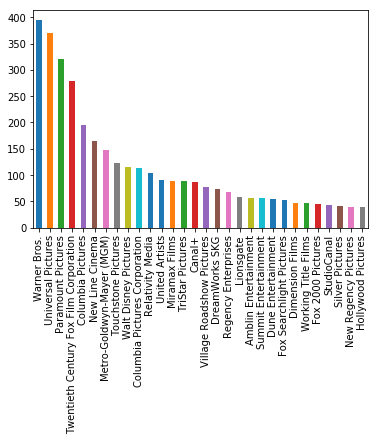

In [12]:
produtoras = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["production_companies"][e])
  #  print(data_dict)
    for palavras in data_dict:
        produtoras.append(palavras['name'])

df_produtoras = pd.DataFrame(produtoras)
df_produtoras
produtorass = df_produtoras[0].value_counts().head(30)
produtorass
produtorass.plot(kind='bar')

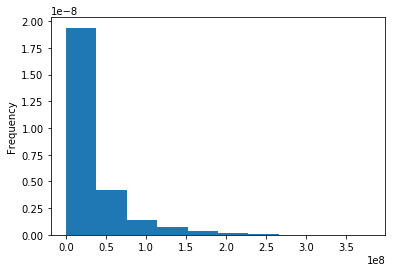

In [13]:
df_mega_clean.budget.plot.hist(density = True)

# Random Forest

# One Hot Encoder